### Препроцессинг признаков

Загружаем исходные признаки в выборках. На данный момент категория не используется, т.к. не успел извлечь

In [1]:
import pandas as pd
import numpy as np
dataset = pd.read_csv("data.csv")
# dataset.drop(["description"], axis=1, inplace=True)
dataset.head()

,title,description,price,product
0,Vaniljeknuter,Størrelse\n \n ...,39.9,43109
1,Erter,Størrelse\n \n ...,9.4,43126
2,Frukost Fullkorn,Størrelse\n \n ...,18.3,43208
3,Frukost Økonomi,Størrelse\n \n ...,26.2,43208
4,Frukost Knekkebrød,Størrelse\n \n ...,14.1,43208


Заполняем пропуски названия и описания пустыми строками

In [2]:
dataset["title"].fillna('', inplace=True)
dataset["description"].fillna('', inplace=True)

Заполняем пропуски цены медианным значением в классе. Если во всем классе пропущена цена, используем медианное значение для всей выборки

In [3]:
for index, row in dataset[np.isnan(dataset["price"])].iterrows():
    prices = dataset[(dataset["product"] == row["product"]) & (~np.isnan(dataset["price"]))]["price"]
    median_price = prices.median()
    dataset.loc[index, "price"] = median_price

dataset["price"].fillna(dataset[~np.isnan(dataset["price"])]["price"].median(), inplace=True)

Получаем X и y для обучающей и тестовой

In [4]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(dataset, test_size=0.5)

Преобразуем title и description в виде bag-of-words

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
for column in ["title", "description"]:  
    vectorizer = CountVectorizer().fit(train[column])
    train = pd.concat([train, pd.DataFrame(vectorizer.transform(train[column]).todense(), index=train.index, columns=vectorizer.vocabulary_).add_suffix("_" + column)], axis=1)
    train = train.drop([column], axis=1)
    test = pd.concat([test, pd.DataFrame(vectorizer.transform(test[column]).todense(), index=test.index, columns=vectorizer.vocabulary_).add_suffix("_" + column)], axis=1)
    test = test.drop([column], axis=1)

Нормализуем цену

In [6]:
from sklearn.preprocessing import StandardScaler
price_scaler = StandardScaler().fit(train["price"])
train = pd.concat([train, pd.DataFrame(price_scaler.transform(train["price"]), index=train.index, columns=["price_norm"])], axis=1)
train = train.drop(["price"], axis=1)
test = pd.concat([test, pd.DataFrame(price_scaler.transform(test["price"]), index=test.index, columns=["price_norm"])], axis=1)
test = test.drop(["price"], axis=1)

/home/anatoli/.local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/anatoli/.local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/anatoli/.local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your dat

In [7]:
train.head()

,product,linser_title,plastbeger_title,venstre_title,akrylmaling_title,vindusmarkise_title,rdj8j_title,dynamic_title,hatt_title,sunt_title,...,selleristang_description,riboflavin_description,byggrynsgrøten_description,takpatespiker_description,1000_description,xenon_description,hjemland_description,fuktgjennomslippende_description,alkohol_description,price_norm
1484,45849,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.103382
1797,50665,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.311504
1477,44377,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.195658
2330,55155,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.175284
2047,52743,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.095974


In [8]:
test.head()

,product,linser_title,plastbeger_title,venstre_title,akrylmaling_title,vindusmarkise_title,rdj8j_title,dynamic_title,hatt_title,sunt_title,...,selleristang_description,riboflavin_description,byggrynsgrøten_description,takpatespiker_description,1000_description,xenon_description,hjemland_description,fuktgjennomslippende_description,alkohol_description,price_norm
1640,53069,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.211487
511,47176,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.010774
1250,45755,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,-0.189916
401,44548,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.193805
575,47602,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.173024


### Получение точности

Оцениваем максимальные стандартные отклонения среди всех классов для каждого признака. Порогом устанавливаем $1.5\sigma$

In [9]:
stds = [];
train_X = train.drop(["product"], axis=1)
for product in train["product"].unique():
    stds.append(np.std(train_X[train["product"] == product]))
threshold = np.max(stds, axis=0)*1.5
threshold

array([ 0.70710678,  0.75      ,  0.        , ...,  0.70710678,
        0.70710678,  3.64982898])

Находим долю верно классифицированных объектов для каждого продукта. 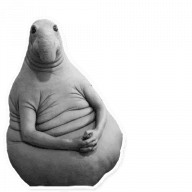

In [10]:
def accuracy(dataset):
    dataset_X = dataset.drop(["product"], axis=1)
    accuracies = []
    for product in dataset["product"].unique():
        positive = dataset_X[dataset["product"] == product]
        negative = dataset_X[dataset["product"] != product]
        mean = np.mean(positive)
        positive_accuracy = (((positive - mean) <= threshold).all(axis=1)).sum()/float(positive.shape[0])
        negative_accuracy = (((negative - mean) > threshold).any(axis=1)).sum()/float(negative.shape[0])
        accuracies.append(np.mean([positive_accuracy, negative_accuracy]))

    return np.mean(accuracies)

In [11]:
accuracy(train)

0.86475440191987074

In [12]:
accuracy(test)

0.79120829258134906

Оцениваем количество кластеров при кластеризации выборок. Пока что пункт бесполезен, т.к. на данном этапе кластеры начинают вписываться в рамки только в случае, если их количество раза в два превышает количество продуктов.

In [ ]:
from sklearn.cluster import KMeans, AgglomerativeClustering

def clusters(dataset):
    dataset_X = dataset.drop(["product"], axis=1)
    for n in range(350, dataset.shape[0], 10):
        print "Clusters: {0}".format(n)
        clusters = AgglomerativeClustering(n_clusters=n).fit_predict(dataset_X)
        stds = [];
        for cluster in np.unique(clusters):
            stds.append(np.std(dataset_X[clusters == cluster]))
        print "Overflows: {0}".format((np.max(stds, axis=0) > threshold).sum())
        if (np.max(stds, axis=0) <= threshold).all():
            break;
    return n

In [ ]:
clusters(train)

In [ ]:
clusters(test)

### Проблема 
Кластер почти никогда не вписывается в очерченные всеми классами в выборке рамки. Можно вместо порога $1.5\sigma$ использовать $a\sigma$, где a - вектор коэффициентов, который тоже устанавливается по выборкам